# 映画の興行収入予測AIの作成

## CSVファイルの読み込み

In [2]:
# pandasライブラリを読み込む
import pandas as pd

# cinema.csvファイルを読み込んでDataFrameオブジェクトを作成する
df = pd.read_csv('cinema-dataset.csv')

# 先頭から3行を表示する
print(df.head(3))


   cinema_id  SNS1  SNS2         actor  original  sales
0       1375   291  1044   8808.994029         0   9731
1       1000   363   568  10290.709370         1  10210
2       1390   158   431   6340.388534         1   8227


## 分布図の確認

In [4]:
# matplotlibライブラリをインポートする
import matplotlib.pyplot as plt

<Axes: xlabel='SNS1', ylabel='sales'>

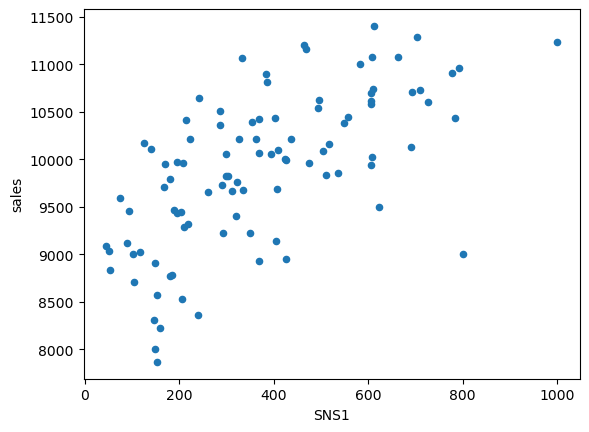

In [6]:
# 散布図を描画する
# DataFrameのplotメソッドを使用し、SNS1列をx軸、sales列をy軸として散布図を描画する
df.plot(kind='scatter', x='SNS1', y='sales')

他の列と興行収入との関係も、同様にグラフで確認してみましょう

<Axes: xlabel='original', ylabel='sales'>

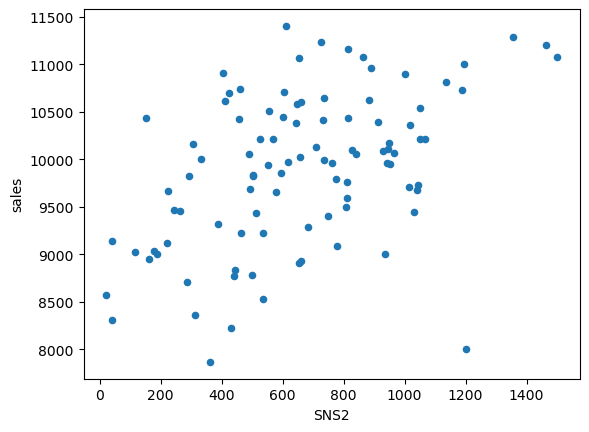

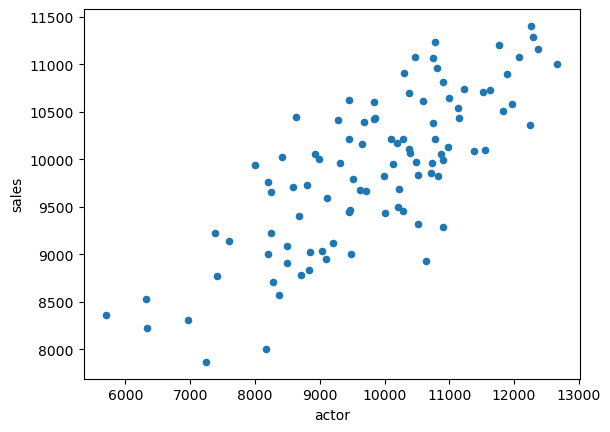

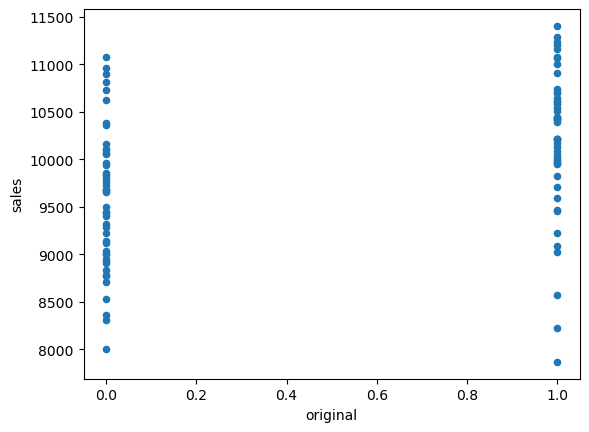

In [8]:
# matplotlibライブラリをインポートする（上でインポート済みなら不要）

# 各列の散布図を描画する
# DataFrameのplotメソッドを使用し、各列をx軸、sales列をy軸として散布図を描画する
df.plot(kind='scatter', x='SNS2', y='sales')
df.plot(kind='scatter', x='actor', y='sales')
df.plot(kind='scatter', x='original', y='sales')

## データの分割

### 特徴量と正解ラベルを取り出す

In [10]:
#特徴量、説明変数、入力
x = df.loc[:, 'SNS1':'original']   # 'SNS1'列から'original'列までの特微量を抽出
#正解ラベル、目的変数、出力
t = df['sales']

print(x)
print(t)

    SNS1  SNS2         actor  original
0    291  1044   8808.994029         0
1    363   568  10290.709370         1
2    158   431   6340.388534         1
3    261   578   8250.485081         0
4    209   683  10908.539550         0
..   ...   ...           ...       ...
92   494  1050  11137.482810         1
93   505   928  11376.038540         1
94   368   966  10393.252480         0
95   326  1068   9454.019853         1
96   402   153  11144.482970         1

[97 rows x 4 columns]
0      9731
1     10210
2      8227
3      9658
4      9286
      ...  
92    10537
93    10084
94    10069
95    10218
96    10435
Name: sales, Length: 97, dtype: int64


### 訓練用とテスト用に分割する

In [12]:
# 関数のインポート
from sklearn.model_selection import train_test_split
# データの分割
x_train, x_test, y_train, y_test = train_test_split(x, t, test_size=0.3, random_state=2230033)

## モデルの準備

In [14]:
# Support Vector Machine (SVM)のインポート
from sklearn.svm import SVR


# SVR（Support Vector Regression）モデルのインスタンス化
# kernel="linear"で線形カーネルを使用する
model = SVR(kernel="linear")

## モデルの学習

In [16]:
model.fit( x_train , y_train )

SVR(kernel='linear')

## 値の予測

In [18]:
# 予測
# 新しいデータ（SNS1、SNS2、actor、original）を渡して予測を行う
new_data = [[150,700,300,1]]
print(f"予測値：{model.predict(new_data)}")

予測値：[6794.2754199]


C:\Users\2230033\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


## モデルの評価

### 平均絶対誤差の算出

In [20]:
# 関数のインポート
from sklearn.metrics import mean_absolute_error

In [22]:
# テストデータを使って学習済みモデルの予測結果と正解ラベルとの平均絶対誤差を計算する
pred = model.predict(x_test) # 予測
mae = mean_absolute_error(y_true=y_test, y_pred=pred) #正解ラベルと予測結果の誤差平均を求める
print(f"平均絶対誤差: {mae}")

平均絶対誤差: 386.7844597769382


### scoreの計算（決定係数）

In [26]:
# モデルの評価
# テストデータで学習モデルを評価し、スコアを計算する
print(f"score:{model.score(x_test,y_test)}")

score:0.541723569150306


## 回帰問題の様々なアルゴリズム

In [28]:
# アルゴリズムの数と一覧
from sklearn.utils.discovery import all_estimators
allReg = all_estimators(type_filter="regressor")
print(len(allReg))
for reg in allReg:
  print(reg)

55
('ARDRegression', <class 'sklearn.linear_model._bayes.ARDRegression'>)
('AdaBoostRegressor', <class 'sklearn.ensemble._weight_boosting.AdaBoostRegressor'>)
('BaggingRegressor', <class 'sklearn.ensemble._bagging.BaggingRegressor'>)
('BayesianRidge', <class 'sklearn.linear_model._bayes.BayesianRidge'>)
('CCA', <class 'sklearn.cross_decomposition._pls.CCA'>)
('DecisionTreeRegressor', <class 'sklearn.tree._classes.DecisionTreeRegressor'>)
('DummyRegressor', <class 'sklearn.dummy.DummyRegressor'>)
('ElasticNet', <class 'sklearn.linear_model._coordinate_descent.ElasticNet'>)
('ElasticNetCV', <class 'sklearn.linear_model._coordinate_descent.ElasticNetCV'>)
('ExtraTreeRegressor', <class 'sklearn.tree._classes.ExtraTreeRegressor'>)
('ExtraTreesRegressor', <class 'sklearn.ensemble._forest.ExtraTreesRegressor'>)
('GammaRegressor', <class 'sklearn.linear_model._glm.glm.GammaRegressor'>)
('GaussianProcessRegressor', <class 'sklearn.gaussian_process._gpr.GaussianProcessRegressor'>)
('GradientBoos